<a href="https://colab.research.google.com/github/VKSi/2021_07_GB_ComputerVision/blob/main/HW_7_Motion_P1_Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка видео
Обучить нейронную сеть для распознавания действий человека по видео на датасете KTH
Библиотеки: [Python, Tensorflow]


### Часть I. Загрузка датасета и директории с путями на Google Drive

## Загрузка и распаковка датасета KTH на GoogleDrive

In [ ]:
import os
import shutil
import glob
# import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = '/content/gdrive/My Drive/AI/GB/CV/'
PATH_L7 = PATH + 'Lesson7/'
PATH_DATA = PATH_L7 + 'data/'

In [ ]:
!pwd

/content


In [ ]:
%cd '/content/gdrive/My Drive/AI/GB/CV/Lesson7/data'

/content/gdrive/My Drive/AI/GB/CV/Lesson7/data


In [ ]:
!pwd

/content/gdrive/My Drive/AI/GB/CV/Lesson7/data


In [ ]:
if 1:
    !wget http://www.nada.kth.se/cvap/actions/walking.zip
    !wget http://www.nada.kth.se/cvap/actions/jogging.zip
    !wget http://www.nada.kth.se/cvap/actions/running.zip
    !wget http://www.nada.kth.se/cvap/actions/boxing.zip
    !wget http://www.nada.kth.se/cvap/actions/handwaving.zip
    !wget http://www.nada.kth.se/cvap/actions/handclapping.zip 

if 1:
    !unzip walking.zip -d walking > /dev/null
    !unzip jogging.zip -d jogging > /dev/null
    !unzip running.zip -d running > /dev/null
    !unzip boxing.zip -d boxing > /dev/null
    !unzip handwaving.zip -d handwaving > /dev/null
    !unzip handclapping.zip -d handclapping > /dev/null

--2021-07-02 21:57:28--  http://www.nada.kth.se/cvap/actions/walking.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/walking.zip [following]
--2021-07-02 21:57:29--  https://www.csc.kth.se/cvap/actions/walking.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.28.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242442411 (231M) [application/zip]
Saving to: ‘walking.zip’

walking.zip         100%[===================>] 231.21M  1.20MB/s    in 3m 15s  

2021-07-02 22:00:45 (1.18 MB/s) - ‘walking.zip’ saved [242442411/242442411]

--2021-07-02 22:00:45--  http://www.nada.kth.se/cvap/actions/jogging.zip
Resolving www.nada.kth.se (www.nada.kth.

## Подготовка датасета для классификации

In [ ]:
classes = [
    'walking',
    'jogging',
    'running',
    'boxing',
    'handwaving',
    'handclapping',
]

In [ ]:
dataset = []
data_root = PATH_DATA  #'./'
for cls in classes:
    print('Processing class: {}'.format(cls))
    for fpath in glob.glob(os.path.join(data_root, cls, '*.avi')):
        cls_idx = classes.index(cls)
        dataset.append((fpath, cls_idx))

Processing class: walking
Processing class: jogging
Processing class: running
Processing class: boxing
Processing class: handwaving
Processing class: handclapping


In [ ]:
import pickle

In [ ]:
with open('kth_paths.pkl', 'wb') as f:
  pickle.dump(dataset, f)

In [ ]:
with open('kth_classes.pkl', 'wb') as f:
  pickle.dump(classes, f)

In [ ]:
with open('kth_paths.pkl', 'rb') as f:
  dataset = pickle.load(f)

In [ ]:
with open('kth_classes.pkl', 'rb') as f:
  classes = pickle.load(f)

## Визуализация кадра из видео

In [ ]:
if 1:
    !pip install scikit-video==1.1.11
import skvideo.io

     |████████████████████████████████| 2.3MB 4.1MB/s 


videodata shape: (555, 120, 160, 3)


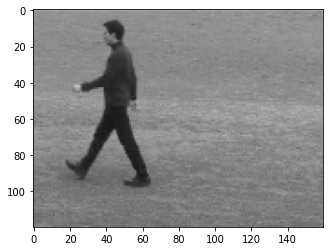

In [ ]:
videodata = skvideo.io.vread(dataset[0][0])
videodata = videodata.astype(np.float32) / 255.
print('videodata shape:', videodata.shape)
plt.imshow(videodata[50, ...])

## Визуализация "движения"

motion shape: (554, 120, 160, 1)


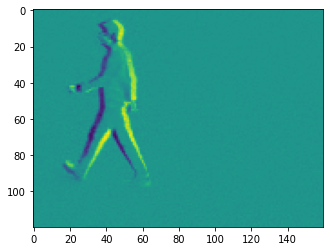

In [ ]:
motion = np.mean(videodata[1:, ...] - videodata[:-1, ...], axis=3, keepdims=True)
print('motion shape:', motion.shape)
plt.imshow(motion[50, ..., 0])

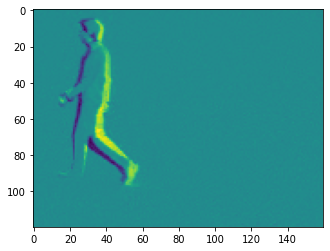

In [ ]:
plt.imshow(motion[54, ..., 0])